In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


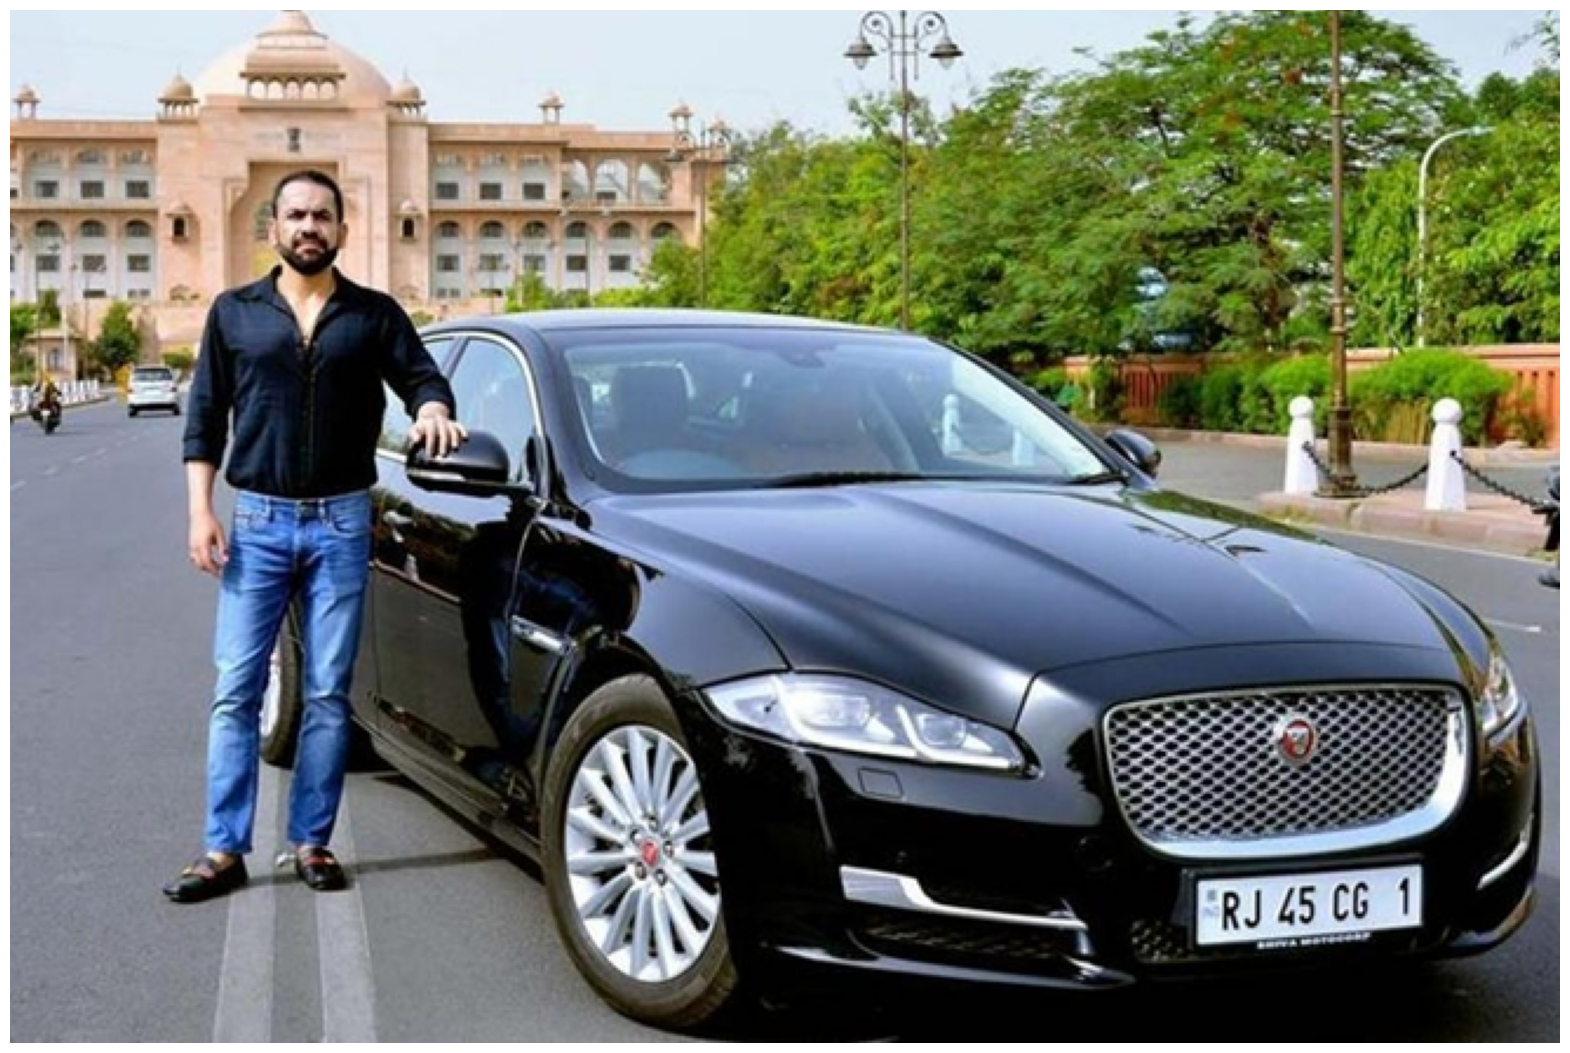

In [3]:
image = cv2.imread("./images/man_car.jpg")
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()


0: 448x640 2 persons, 2 cars, 66.7ms
Speed: 4.4ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict34
>>>>>Helo>>>>
boxs: tensor([[ 65.3384,  66.9267, 193.8025, 379.9306],
        [142.4846, 125.0721, 658.3386, 428.6773],
        [ 48.4233, 150.8490,  73.8467, 173.1593],
        [  9.2699, 157.0375,  22.6339, 180.2753]])
cls###: [0, 2, 2, 0]
input_box: [     65.338      66.927       193.8      379.93]
input_box: [     65.338      66.927       193.8      379.93]
input_box: [     65.338      66.927       193.8      379.93]
input_box: [     65.338      66.927       193.8      379.93]


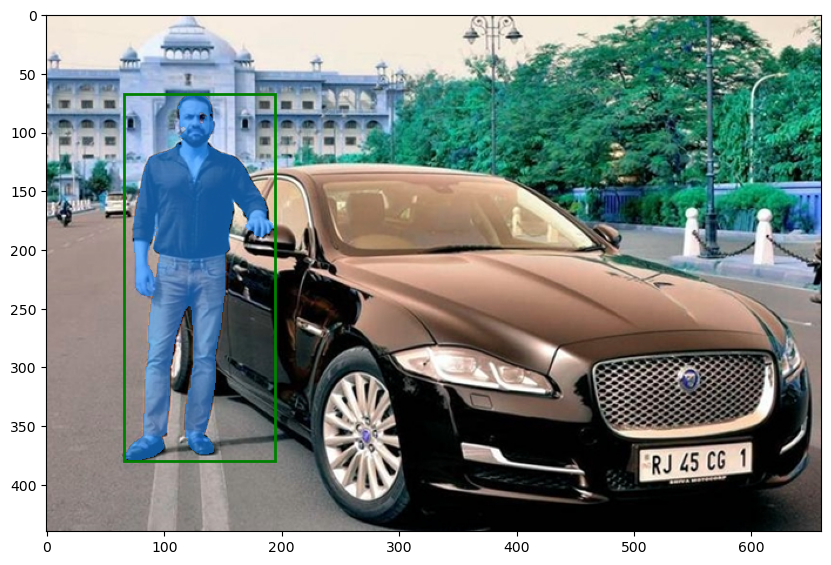

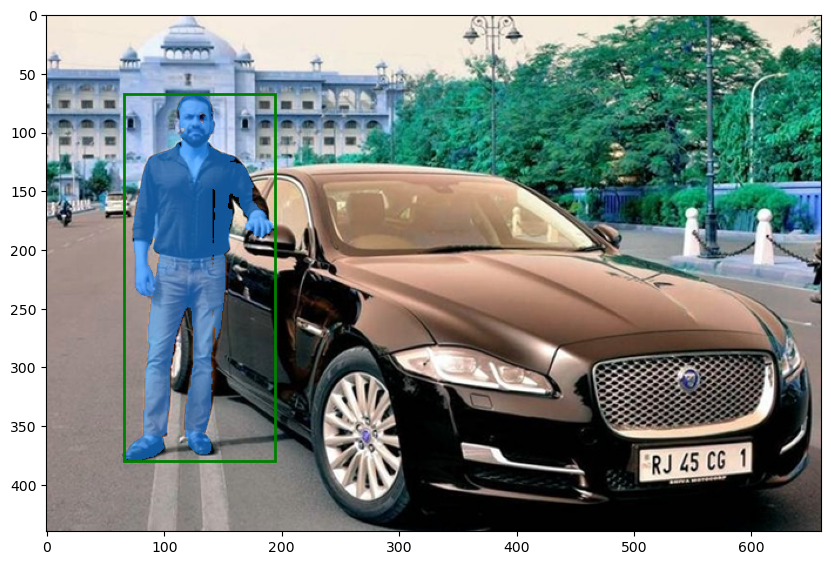

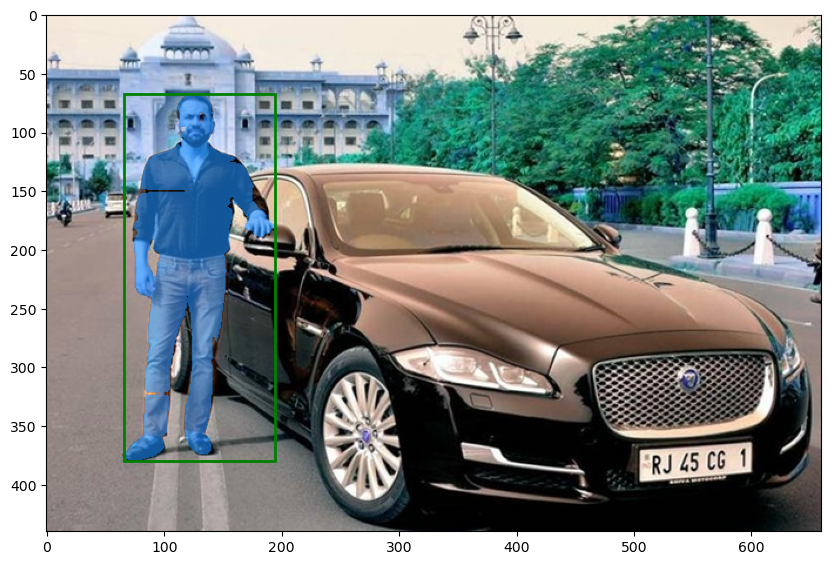

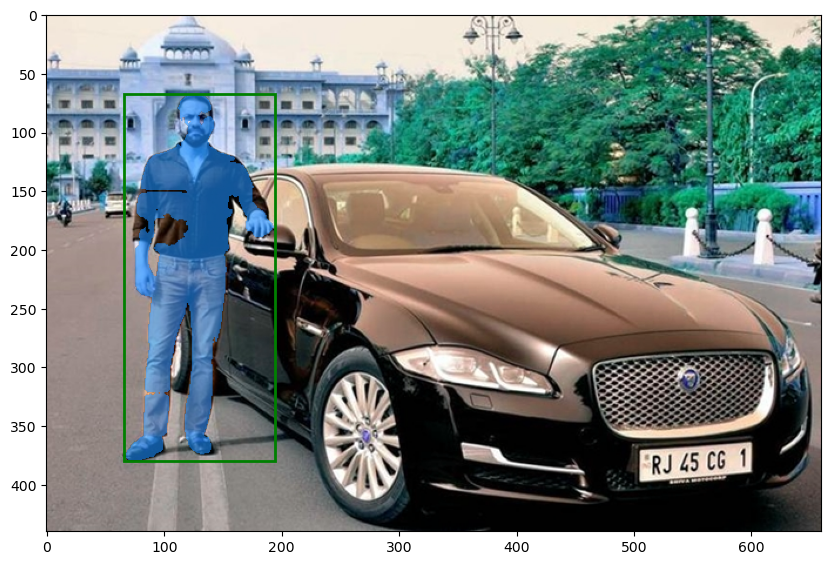

In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

import matplotlib
# matplotlib.use('TkAgg')

image = cv2.imread('./images/man_car.jpg')
orig_image = image.copy()

model = YOLO('./models/yolov8n.pt')
results = model(image, save=True) #classes = [0,1,2,3,4,5,6,7,8,])
class_names = model.names
print(f"names: {class_names}")
#Plot rect
for result in results:
    print(">>>>>Helo>>>>")
    boxes = result.boxes
    boxs = boxes.xyxy
    print(f"boxs: {boxs}")
    cls = boxes.cls
    cls = list(map(int, cls.tolist()))
    print(f"cls###: {cls}")
#     class_names = ['person', 'bicycle', 'car', 'bus', 'cat', 'dog']
#     output_index = cls
#     class_name = class_names[0]
    
#     print(class_name)
    if len(cls)>0:
        for c in range(len(cls)):
            class_name = class_names[cls[c]]
            #get the coord of bounding box
            l = boxs[c].tolist()
            x1, y1, x2, y2 = l[0],l[1],l[2],l[3]        
            cv2.rectangle(image, (int(x1), int(y1), int(x2), int(y2)), (0,255,0), 2)

            #add text
            text = class_name
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1.5
            thickness = 4
            text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
            text_x = int(x1+5)
            text_y = int(y1+text_size[1]+5)
            cv2.putText(image, text, (text_x, text_y), font, font_scale, (0,255,0), thickness)


            import torch
            DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

            MODEL_TYPE = "vit_h"
            sam_checkpoint = './models/sam_vit_h_4b8939.pth'
            from segment_anything import sam_model_registry, SamPredictor

            sam = sam_model_registry[MODEL_TYPE](checkpoint=sam_checkpoint).to(device=DEVICE)

            predictor = SamPredictor(sam)
            predictor.set_image(image)

            input_box = np.array(boxs[0].tolist())
            print(f"input_box: {input_box}")

            mask, _, _ = predictor.predict(
                            point_coords = None,
                            point_labels = None,
                            box=input_box[None, :],
                            multimask_output=False)


            plt.figure(figsize=(10,10))
            plt.imshow(orig_image)
            show_mask(mask[0], plt.gca())
            show_box(input_box, plt.gca())
        plt.savefig('output2.jpg')
        plt.show()

        
        
        



In [12]:
boxs[cls[0]]

tensor([ 65.3384,  66.9267, 193.8025, 379.9306])

In [ ]:
pip install ultralytics

In [21]:
pip install segment-anything

Note: you may need to restart the kernel to use updated packages.
